# Setup

In [255]:
import requests
import re

from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

In [256]:
%matplotlib inline

## Scrape IMSLP

In [257]:
url = "http://imslp.org/wiki/List_of_works_by_Ludwig_van_Beethoven"

In [258]:
page = requests.get(url)

In [259]:
soup = BeautifulSoup(page.text, 'html.parser')

In [260]:
soup.head()

[<title>List of works by Ludwig van Beethoven - IMSLP/Petrucci Music Library: Free Public Domain Sheet Music</title>,
 <meta charset="utf-8"/>,
 <meta content="MediaWiki 1.18.1" name="generator"/>,
 <meta content="IE=edge" http-equiv="X-UA-Compatible"/>,
 <meta content="width=device-width, initial-scale=1, maximum-scale=1" name="viewport"/>,
 <link href="/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>,
 <link href="/android-touch-icon.png" rel="icon" sizes="192x192"/>,
 <link href="/favicon.ico" rel="shortcut icon"/>,
 <link href="/opensearch_desc.php" rel="search" title="IMSLP (en)" type="application/opensearchdescription+xml"/>,
 <link href="//imslp.org/api.php?action=rsd" rel="EditURI" type="application/rsd+xml"/>,
 <link href="http://creativecommons.org/licenses/by-sa/4.0/" rel="copyright"/>,
 <link href="/index.php?title=Special:RecentChanges&amp;feed=atom" rel="alternate" title="IMSLP Atom feed" type="application/atom+xml"/>,
 <link href="/load.php?debug=false&amp

## Get table

In [261]:
table = soup.find("table")

In [262]:
table_text = []

for row in table.findAll("tr"):
    cells = row.findAll(["th", "td"])
    # Note: Already checked that all cells have length of 10
    cell_contents = [cell.text.replace("\n", "") for cell in cells] # Remove new line from each string in the process
    table_text.append(cell_contents)

In [263]:
raw_works = pd.DataFrame(table_text[1:], columns = table_text[0])

# Explore

In [264]:
print(raw_works.shape)
raw_works.head()

(557, 10)


,Op.,WoO,Hess,Biam-onti,Title,Key,Date,Scoring,Genre,Notes
0,001,—,—,062,Piano Trios (3):,,1792-94,vn vc pf,Chamber,
1,001/1,—,—,062/1,Piano Trio,E♭ major,1792-93,vn vc pf,Chamber,
2,001/2,—,—,062/2,Piano Trio,G major,1792-94,vn vc pf,Chamber,
3,001/3,—,—,062/3,Piano Trio,C minor,1792-94,vn vc pf,Chamber,arr. for 2vn va vc as Op.104
4,002,—,—,087,Piano Sonatas (3):,,1793-95,pf,Keyboard,


In [267]:
raw_works.sort_values("Date").head()

,Op.,WoO,Hess,Biam-onti,Title,Key,Date,Scoring,Genre,Notes
397,—,099,—,—,Italian Partsongs,,,,,
291,—,016,—,—,Ecossaises(12),,,orch,Orchestral,spurious
553,—,—,Anh. 10,—,Andante favori,F major,,2vn va vc,Chamber,arr. of WoO 57; Beethoven's authorship uncertain
544,—,Anh. 14,—,—,Waltzes (6),,,pf,Keyboard,spurious; authorship unknown
308,—,027,—,039,Duets (3),,,cl bn,Chamber,Beethoven's authorship doubtful; also arr. fo...


# Clean

In [291]:
df = raw_works.copy()

In [292]:
df.columns = [column.lower() for column in df.columns]

In [293]:
df.head()

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes
0,001,—,—,062,Piano Trios (3):,,1792-94,vn vc pf,Chamber,
1,001/1,—,—,062/1,Piano Trio,E♭ major,1792-93,vn vc pf,Chamber,
2,001/2,—,—,062/2,Piano Trio,G major,1792-94,vn vc pf,Chamber,
3,001/3,—,—,062/3,Piano Trio,C minor,1792-94,vn vc pf,Chamber,arr. for 2vn va vc as Op.104
4,002,—,—,087,Piano Sonatas (3):,,1793-95,pf,Keyboard,


In [294]:
len(df[df["date"] == ""])

10

In [295]:
# Remove works without dates (unable to use in visualization)
df = df[df["date"] != ""]

Maybe the easiest way to get rid of these header-subheader type rows is to remove rows without keys. Plus, we can't really use a work if it happens not to have a key either...

But to know whether we're removing things because it's a heading or it's a piece that happens not to have a listed key, maybe regex ([0-9]) or something...

## Key

In [296]:
len(df[df["key"] == ""])

146

In [297]:
no_key = df[df["key"] == ""]

In [298]:
no_key[pd.isnull(no_key["title"])]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes


In [299]:
len(no_key[no_key["title"].apply(lambda x: bool(re.search(r"\([0-9]\)", x)))])

41

In [300]:
no_key[~no_key["title"].apply(lambda x: bool(re.search(r"\([0-9]\)", x)))]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes
65,032,—,—,421,"An die Hoffnung (""Die du so gern in heilgen N...",,1804-05,v pf,Vocal,1st setting; see also Op.94
77,043,—,—,288,Die Geschöpfe des Prometheus (The Creatures o...,,1800-01,orch,Stage,
120,065,—,—,116,Ah! Perfido,,1796,sop orch,Vocal,
129,072,—,109,423,"Fidelio (Leonore, oder Der Triumph der ehelic...",,1804-05,vv ch orch,Stage,1st version; includes Op. 72a
130,072,—,110,427,"Fidelio (Leonore, oder Der Triumph der ehelic...",,1805-06,vv ch orch,Stage,2nd version; includes Op. 72b (and WoO 2/2?)
131,072,—,—,570,"Fidelio, opera in 2 acts",,1814,vv ch orch,Stage,3rd version
137,075/1,—,—,502/1,"Mignon (""Kennst du das Land"")",,1809,v pf,Vocal,
138,075/2,—,—,502/2,"Neue Liebe, neues Leben (""Herz, mein Herz, wa...",,1809,v pf,Vocal,2nd setting of WoO 27
139,075/3,—,—,502/3,"Aus Goethes Faust (""Es war einmal ein König"")",,1809,v pf,Vocal,
140,075/4,—,—,502/4,"Gretels Warnung (""Mit Liebesblick und Spiel"")",,1809,v pf,Vocal,


Maybe next steps include going into each piece and getting the time or number of measures in a specific key (not the most practical considering rather stable formulas for certain musical forms, such as symphonies)

In [301]:
# Anyway, let's go ahead and take out those without keys for our first pass trialing
df = df[df["key"] != ""]

In [302]:
len(df)

401

In [320]:
df["key"] = df["key"].str.replace("-flat", "♭")

In [321]:
print(df["key"].nunique())
df["key"].unique()

22


array([' E♭ major', ' G major', ' C minor', ' F minor', ' A major',
       ' C major', ' F major', ' G minor', ' D major', ' B♭ major',
       ' E major', ' A minor', ' A♭ major', ' C♯ minor', ' D minor',
       ' F♯ minor', ' E minor', ' F♯ major', ' B♭ minor',
       ' C major-C minor', ' B minor', ' A♭ major-D major'], dtype=object)

In [322]:
sorted(df["key"].unique())

[' A major',
 ' A minor',
 ' A♭ major',
 ' A♭ major-D major',
 ' B minor',
 ' B♭ major',
 ' B♭ minor',
 ' C major',
 ' C major-C minor',
 ' C minor',
 ' C♯ minor',
 ' D major',
 ' D minor',
 ' E major',
 ' E minor',
 ' E♭ major',
 ' F major',
 ' F minor',
 ' F♯ major',
 ' F♯ minor',
 ' G major',
 ' G minor']

### Mode

In [239]:
def decide_key(key):
    if "major" in key:
        if "minor" not in key:
            return "major"
        else:
            return "other"
    elif "minor" in key:
        if "major" not in key:
            return "minor"
        else:
            return "other"
    else:
        return None

In [241]:
df["mode"] = df["key"].apply(decide_key)

## Date

In [326]:
df["date"].min(), df["date"].max()

(' -', ' —')

Well...

In [327]:
# Let's say we need to have date values with numbers
df[df["date"] == " -"]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes
556,—,—,—,—,Hymne an die Nacht,C major,-,ch pf,Vocal,setting of theme from Op.57; Beethoven's auth...


In [328]:
# Strip this whitespace...?
df["date"] = df["date"].str.strip()

In [329]:
df[~df["date"].apply(lambda x: bool(re.search("[0-9]", x)))]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes
118,063,—,Anh.14,II/65,Piano Trio,E♭ major,—,vn va vc,Chamber,arr. of Op.4; Beethoven's authorship doubtful
556,—,—,—,—,Hymne an die Nacht,C major,-,ch pf,Vocal,setting of theme from Op.57; Beethoven's auth...


In [330]:
# Yep, we can take those out
df = df[df["date"].apply(lambda x: bool(re.search("[0-9]", x)))]

In [331]:
df["date"].min(), df["date"].max()

('1782', '1826')

In [332]:
len(df)

399

In [333]:
# So how many of these are date ranges...
len(df[df["date"].str.contains("-")])

167

Dang, we need to find ways to decide... for now, let's keep a column for min and max dates

In [334]:
df["min_date"] = df["date"].apply(lambda x: x.split("-")[0] if "-" in x else x)
# Need to add the first two characters
df["max_date"] = df["date"].apply(lambda x: x[0:2] + x.split("-")[1] if "-" in x else x)
# Need to fix of turn of century exception
df["max_date"] = df["max_date"].apply(lambda x: x[2:] if len(x) == 6 else x) # 

In [335]:
df.head()

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date
1,001/1,—,—,062/1,Piano Trio,E♭ major,1792-93,vn vc pf,Chamber,,1792,1793
2,001/2,—,—,062/2,Piano Trio,G major,1792-94,vn vc pf,Chamber,,1792,1794
3,001/3,—,—,062/3,Piano Trio,C minor,1792-94,vn vc pf,Chamber,arr. for 2vn va vc as Op.104,1792,1794
5,002/1,—,—,087/1,Piano Sonata No.1,F minor,1793-95,pf,Keyboard,,1793,1795
6,002/2,—,—,087/2,Piano Sonata No.2,A major,1794-95,pf,Keyboard,,1794,1795


In [336]:
# Looks like there are question marks... let's just take these out too to resolve issues
df[df["date"].str.contains("\?")]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date
271,—,002b,117,554,Prelude to Act II,D major,1805?,orch,Stage,now thought to be from the opening of Act II ...,1805?,1805?
347,—,053,066,159,Allegretto,C minor,1796-97 ?,pf,Keyboard,2nd version,1796,97 ?
541,—,Anh. 04,—,—,Flute Sonata,B♭ major,1790-92 ?,fl pf,Chamber,Beethoven's authoship uncertain,1790,92 ?
543,—,Anh. 10,—,—,Variations on 'Ich hab ein kleines Hüttchen nur',B♭ major,1795 ?,pf,Keyboard,Beethoven's authorship is doubtful,1795 ?,95 ?


In [337]:
df = df[~df["date"].str.contains("\?")]

In [338]:
len(df)

395

In [339]:
# Alright, let's find dates where there is something other than a number or "-"

In [340]:
df[(df["date"] != r"[0-9]*") | (df["date"] != r"[0-9]*-[0-9]*")]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date
1,001/1,—,—,062/1,Piano Trio,E♭ major,1792-93,vn vc pf,Chamber,,1792,1793
2,001/2,—,—,062/2,Piano Trio,G major,1792-94,vn vc pf,Chamber,,1792,1794
3,001/3,—,—,062/3,Piano Trio,C minor,1792-94,vn vc pf,Chamber,arr. for 2vn va vc as Op.104,1792,1794
5,002/1,—,—,087/1,Piano Sonata No.1,F minor,1793-95,pf,Keyboard,,1793,1795
6,002/2,—,—,087/2,Piano Sonata No.2,A major,1794-95,pf,Keyboard,,1794,1795
7,002/3,—,—,087/3,Piano Sonata No.3,C major,1794-95,pf,Keyboard,,1794,1795
8,003,—,—,105,String Trio,E♭ major,1794,vn va vc,Chamber,see also Op.64,1794,1794
9,004,—,—,115,String Quintet,E♭ major,1795,2vn 2va vc,Chamber,based on Op.103; see also Op.63,1795,1795
11,005/1,—,—,106/1,Cello Sonata No.1,F major,1796,vc pf,Chamber,,1796,1796
12,005/2,—,—,106/2,Cello Sonata No.2,G minor,1796,vc pf,Chamber,,1796,1796


In [341]:
# Uh...

In [342]:
df[~df["date"].apply(lambda x: bool(re.match(r"[0-9]*-[0-9]*", x)))]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date
8,003,—,—,105,String Trio,E♭ major,1794,vn va vc,Chamber,see also Op.64,1794,1794
9,004,—,—,115,String Quintet,E♭ major,1795,2vn 2va vc,Chamber,based on Op.103; see also Op.63,1795,1795
11,005/1,—,—,106/1,Cello Sonata No.1,F major,1796,vc pf,Chamber,,1796,1796
12,005/2,—,—,106/2,Cello Sonata No.2,G minor,1796,vc pf,Chamber,,1796,1796
32,014/2,—,—,284,Piano Sonata No.10,G major,1799,pf,Keyboard,,1799,1799
36,017,—,—,206,Horn Sonata,F major,1800,hn pf,Chamber,,1800,1800
45,020,—,—,204,Septet,E♭ major,1799,cl bn hn vn va vc db,Chamber,,1799,1799
47,022,—,—,208,Piano Sonata No.11,B♭ major,1800,pf,Keyboard,,1800,1800
50,025,—,—,114,Serenade,D major,1801,"For flute, violin, viola",Chamber,arr. for fl pf as Op.41,1801,1801
54,027/2,—,—,297/2,Piano Sonata No.14 ('Moonlight'),C♯ minor,1801,pf,Keyboard,,1801,1801


In [343]:
# Hmm...
df[~df["date"].str.match(r"[0-9]*-[0-9]*|[0-9]*")]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date


In [224]:
chars_to_match = [str(x) for x in list(range(10)) + ["-"]]

In [225]:
chars_to_match

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '-']

In [226]:
df[df["date"].apply(lambda x: any(char not in chars_to_match for char in x))]

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date,avg_date
108,058,—,—,431,Piano Concerto No.4,G major,"1804-07, rev.1809",pf orch,Orchestral,arr. for 2vn va vc db pf as Op.58a,1804,"1807, rev.1809",1805.5
296,—,018,007,780,March ('Marsch für die bohmische Landwehr') (...,F major,1822 ca.,ww br perc,Orchestral,"3rd version, with trio and 'Turkish' orchestr...",1822 ca.,1822 ca.,1822.0
299,—,019,009,781,March,F major,1822 ca.,ww br perc,Orchestral,"3rd version, with trio and 'Turkish' orchestr...",1822 ca.,1822 ca.,1822.0
301,—,020,—,525,March ('Zapfenstreich') ('The Tattoo'),C major,1822 ca.,ww br perc,Orchestral,"2nd version, with trio",1822 ca.,1822 ca.,1822.0


Keep these exceptions in mind... just use circas, though ignore multiple versions; just use ca. (circa)

In [227]:
df["min_date"] = df["min_date"].str.replace(" ca.", "")
df["max_date"] = df["max_date"].str.replace(" ca.", "")

In [228]:
df.loc[df["max_date"].str.contains("rev"), "max_date"] = 1807

### Convert to int

In [229]:
df["min_date"] = df["min_date"].apply(int)
df["max_date"] = df["max_date"].apply(int)
df["avg_date"] = (df["min_date"] + df["max_date"]) / 2

In [231]:
df.head()

,op.,woo,hess,biam-onti,title,key,date,scoring,genre,notes,min_date,max_date,avg_date
1,001/1,—,—,062/1,Piano Trio,E♭ major,1792-93,vn vc pf,Chamber,,1792,1793,1792.5
2,001/2,—,—,062/2,Piano Trio,G major,1792-94,vn vc pf,Chamber,,1792,1794,1793.0
3,001/3,—,—,062/3,Piano Trio,C minor,1792-94,vn vc pf,Chamber,arr. for 2vn va vc as Op.104,1792,1794,1793.0
5,002/1,—,—,087/1,Piano Sonata No.1,F minor,1793-95,pf,Keyboard,,1793,1795,1794.0
6,002/2,—,—,087/2,Piano Sonata No.2,A major,1794-95,pf,Keyboard,,1794,1795,1794.5


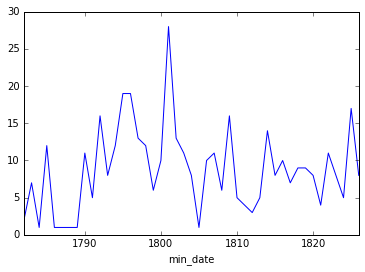

In [232]:
df.groupby("min_date").size().plot()

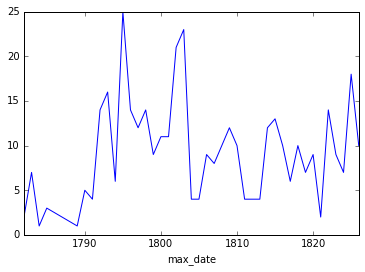

In [234]:
df.groupby("max_date").size().plot()

In [236]:
df.groupby("key")["avg_date"].mean().sort_values()

key
 E-flat major        1784.000000
 A♭ major-D major    1790.000000
 G major             1800.392857
 F♯ minor            1801.500000
 C major-C minor     1802.000000
 C minor             1802.739130
 F minor             1803.000000
 A major             1803.685185
 D major             1804.053191
 E♭ major            1804.781818
 F major             1805.686047
 E minor             1806.875000
 C major             1807.061538
 G minor             1807.071429
 A minor             1808.166667
 F♯ major            1809.000000
 A♭ major            1809.500000
 E major             1810.178571
 B♭ major            1810.863636
 C♯ minor            1813.250000
 B♭ minor            1814.000000
 D minor             1814.388889
 B minor             1821.000000
Name: avg_date, dtype: float64

In [245]:
import numpy as np

In [246]:
df.groupby("mode")["avg_date"].agg([np.mean, np.size])

,mean,size
mode,,
major,1805.378012,332.0
minor,1806.540323,62.0
other,1802.000000,1.0


In [ ]:
# Graph of compositions by year, separated by mode, area graph?
https://matplotlib.org/examples/pylab_examples/stackplot_demo.html